In [1]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(ggfittext)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggfittext’ was built under R version 4.3.2”


In [2]:
dir_fig = 'R_trans/eff/'

In [3]:
file_main <- 'test.tsv'
df_main <- read.table(file_main, header = TRUE, sep = "\t")
print(dim(df_main))
#df_main

# filter df
df_flt = df_main

[1] 918557    356


In [4]:
# filter df
df_flt <- df_main %>%
filter(SN_GB >= 50)

print(dim(df_flt))

[1] 892324    356


In [5]:
### clean features
fts = c('FDR_ASD_cds', 'FDR_DD_cds', 'FDR_NDD_cds',
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        #'EV_CONS_EL_FRAC_10_cds',
        #'S_HET_10_cds',
        'FDR_ASD_utr', 'FDR_DD_utr', 'FDR_NDD_utr',
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        #'EV_CONS_EL_FRAC_10_utr',
        #'S_HET_10_utr',
        'FDR_ASD_intron', 'FDR_DD_intron', 'FDR_NDD_intron', 
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        #'EV_CONS_EL_FRAC_10_ncd',
        #'S_HET_10_intron',
        'GNOCCHI_MAX_4', 'GNOCCHI_MAX_3', 'GNOCCHI_MAX_2')
fts_labels = c('ASD FDR, CDS', 'DD FDR, CDS', 'NDD FDR, CDS',
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               #'Evol. Consv. frc≥.1, CDS',
               #'S het≥0.01, CDS',
               'ASD FDR, UTR', 'DD FDR, UTR', 'NDD FDR, UTR', 
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               #'Evol. Consv. frc≥.1, UTR',
               #'S het≥0.01, UTR',
               'ASD FDR, intron', 'DD FDR, intron', 'NDD FDR, intron', 
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               #'Evol. Consv. frc≥.1, non-CD',
               #'S het≥0.01, intron',
               'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

In [6]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

In [19]:
pb_zs_thrs = c(3, 4, 5, 6)
ont_zs_thrs = c(7, 9, 11, 13)

#paste0('PB_gt', pb_zs_thrs)
#c(paste0('PB_gt', pb_zs_thrs), paste0('ONT_gt', ont_zs_thrs))
c(paste0('PB_gt', pb_zs_thrs), paste0('ONT_gt', ont_zs_thrs))

[1] "PB_gt3"   "PB_gt4"   "PB_gt5"   "PB_gt6"   "ONT_gt7"  "ONT_gt9"  "ONT_gt11"
[8] "ONT_gt13"

[1] "======================================================="
[1] "X_FDR_ASD_cds"
[1] "X_FDR_DD_cds"
[1] "X_FDR_NDD_cds"
[1] "X_PLIp9_DEV_BR_GENE_10_cds"
[1] "X_DEV_BR_GENE_10_cds"
[1] "X_PLIp9_cds"
[1] "X_LOWPLI_cds"
[1] "X_FDR_ASD_utr"
[1] "X_FDR_DD_utr"
[1] "X_FDR_NDD_utr"
[1] "X_PLIp9_DEV_BR_GENE_10_utr"
[1] "X_DEV_BR_GENE_10_utr"
[1] "X_PLIp9_utr"
[1] "X_LOWPLI_utr"
[1] "X_FDR_ASD_intron"
[1] "X_FDR_DD_intron"
[1] "X_FDR_NDD_intron"
[1] "X_PLIp9_DEV_BR_GENE_10_intron"
[1] "X_DEV_BR_GENE_10_intron"
[1] "X_PLIp9_intron"
[1] "X_LOWPLI_intron"
[1] "X_GNOCCHI_MAX_4"
[1] "X_GNOCCHI_MAX_3"
[1] "X_GNOCCHI_MAX_2"
[1] "ORs:"
 [1] 3.8888889 2.0000000 2.4480519 2.5714286 1.5573770 1.3427230 1.0509213
 [8] 1.2857143 0.7142857 0.8571429 2.5000000 1.0620915 1.2719298 1.0766932
[15] 1.4084848 1.1501028 1.1969217 0.9395731 1.1232497 1.0222064 1.0442570
[22] 1.3061238 1.0953866 1.0582612
[1] "tr_case_ntr_case:"
 [1] "14/6"        "14/14"       "29/22"       "32/28"       "55/61"      
 [6] "78/71" 

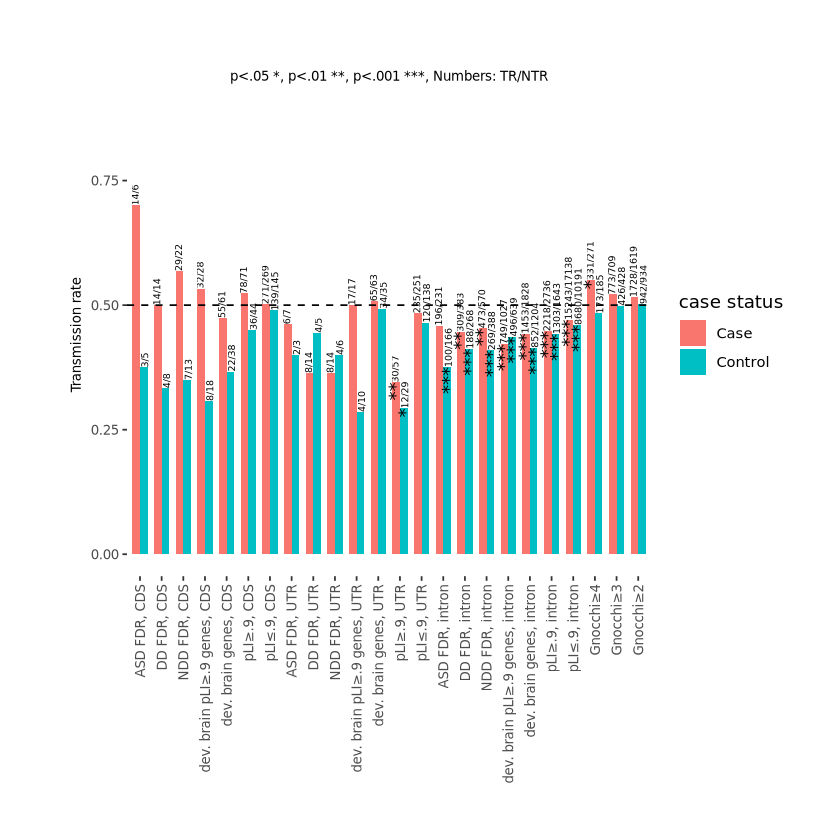

[1] "======================================================="
[1] "X_FDR_ASD_cds"
[1] "X_FDR_DD_cds"
[1] "X_FDR_NDD_cds"
[1] "X_PLIp9_DEV_BR_GENE_10_cds"
[1] "X_DEV_BR_GENE_10_cds"
[1] "X_PLIp9_cds"
[1] "X_LOWPLI_cds"
[1] "X_FDR_ASD_utr"
[1] "X_FDR_DD_utr"
[1] "X_FDR_NDD_utr"
[1] "X_PLIp9_DEV_BR_GENE_10_utr"
[1] "X_DEV_BR_GENE_10_utr"
[1] "X_PLIp9_utr"
[1] "X_LOWPLI_utr"
[1] "X_FDR_ASD_intron"
[1] "X_FDR_DD_intron"
[1] "X_FDR_NDD_intron"
[1] "X_PLIp9_DEV_BR_GENE_10_intron"
[1] "X_DEV_BR_GENE_10_intron"
[1] "X_PLIp9_intron"
[1] "X_LOWPLI_intron"
[1] "X_GNOCCHI_MAX_4"
[1] "X_GNOCCHI_MAX_3"
[1] "X_GNOCCHI_MAX_2"
[1] "ORs:"
 [1]       NaN       Inf       Inf       Inf 1.7142857 3.7500000 1.3760684
 [8]       NaN 0.5000000 0.5000000 0.1666667 1.2244898 0.3000000 1.1326923
[15] 1.2222222 0.9559033 1.0684932 0.7502577 1.0842679 0.9066667 1.0148230
[22] 1.2256729 0.9870958 0.9058553
[1] "tr_case_ntr_case:"
 [1] "0/0"       "2/5"       "3/8"       "1/7"       "4/14"      "3/12"     
 [7] "23/39

Warning message:
“Removed 3 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range (`geom_text()`).”


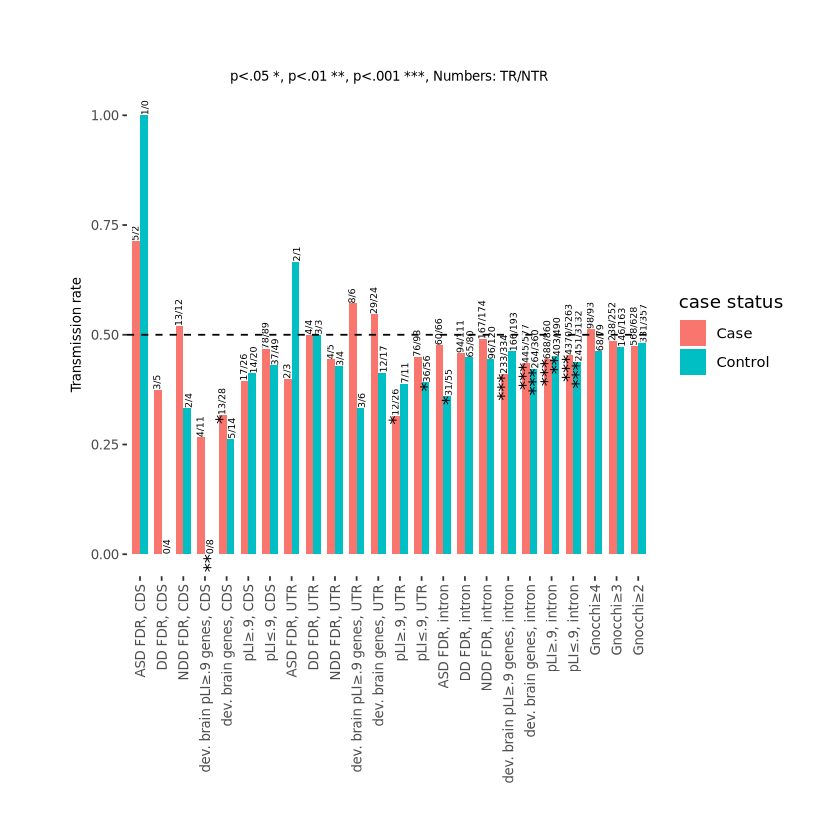

[1] "======================================================="
[1] "X_FDR_ASD_cds"
[1] "X_FDR_DD_cds"
[1] "X_FDR_NDD_cds"
[1] "X_PLIp9_DEV_BR_GENE_10_cds"
[1] "X_DEV_BR_GENE_10_cds"
[1] "X_PLIp9_cds"
[1] "X_LOWPLI_cds"
[1] "X_FDR_ASD_utr"
[1] "X_FDR_DD_utr"
[1] "X_FDR_NDD_utr"
[1] "X_PLIp9_DEV_BR_GENE_10_utr"
[1] "X_DEV_BR_GENE_10_utr"
[1] "X_PLIp9_utr"
[1] "X_LOWPLI_utr"
[1] "X_FDR_ASD_intron"
[1] "X_FDR_DD_intron"
[1] "X_FDR_NDD_intron"
[1] "X_PLIp9_DEV_BR_GENE_10_intron"
[1] "X_DEV_BR_GENE_10_intron"
[1] "X_PLIp9_intron"
[1] "X_LOWPLI_intron"
[1] "X_GNOCCHI_MAX_4"
[1] "X_GNOCCHI_MAX_3"
[1] "X_GNOCCHI_MAX_2"
[1] "ORs:"
 [1]       NaN       NaN       NaN       Inf 0.2500000       Inf 1.4065934
 [8]       NaN 0.0000000 0.0000000 0.0000000 2.2500000 0.1481481 1.2272727
[15] 1.0131579 1.5826087 1.4681818 0.8808096 1.2779463 0.9277167 0.8967328
[22] 0.6095238 0.6818182 0.7097834
[1] "tr_case_ntr_case:"
 [1] "0/0"       "0/0"       "0/3"       "1/4"       "1/6"       "2/7"      
 [7] "8/13"

Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_text()`).”


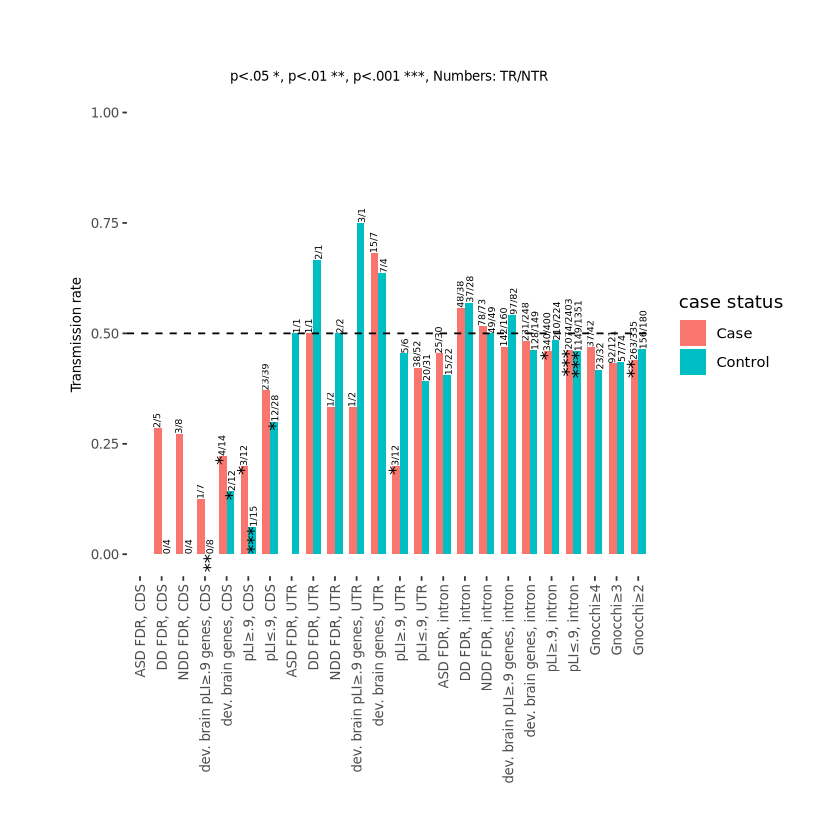

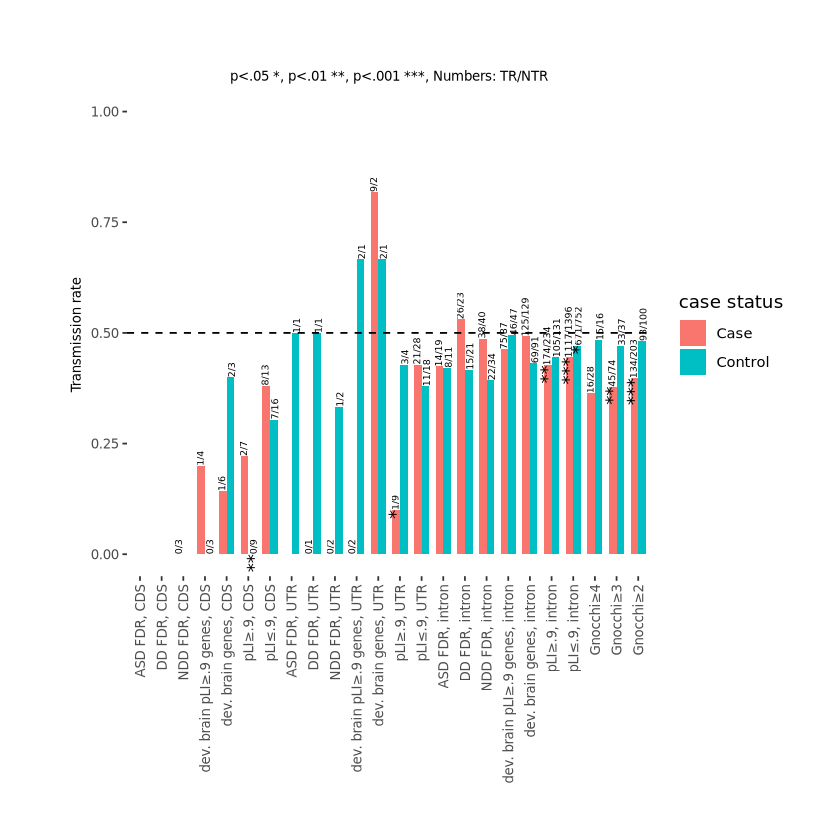

In [13]:
#pb_zs_thrs = c(3, 4, 5, 6)
##ont_zs_thrs = c(7, 9, 11, 13)
#ont_zs_thrs = c(7, 9)
#all_zs_thrs = c(pb_zs_thrs, ont_zs_thrs)

all_zs_thrs = c(3, 5, 7, 9)
supp_thr = 3

#plat_zs_thrs = c(paste0('PB_gt', pb_zs_thrs), paste0('ONT_gt', ont_zs_thrs))
print_stuff = F

#for (i_zs in 1:length(plat_zs_thrs)) {
#for (i_zs in 1:1) {
for (i_zs in 1:length(all_zs_thrs)) {
    #plat_zs_thr = plat_zs_thrs[i_zs]
    zs_thr = all_zs_thrs[i_zs]
    #fig_name_binom = paste(dir_fig, "trans_binomial_ZS", zs_thr, '_', plat_zs_thr, "_clean", ".png", sep='')
    fig_name_binom = paste(dir_fig, "trans_binomial_ZS", zs_thr, "_supp", supp_thr, ".png", sep='')
    print('=======================================================')

    ORs = c()
    pvals = c()
    tr_cases = c()
    ntr_cases = c()
    tr_cons = c()
    ntr_cons = c()
    pval.bin.cases = c()
    pval.bin.controls = c()
    lb.bin.cases = c()
    lb.bin.controls = c()
    ub.bin.cases = c()
    ub.bin.controls = c()
    tr.rate.cases = c()
    tr.rate.controls = c()
    #for (ft in fts[c(11:11)]) {
    for (ft in fts) {
        var = paste('X_', ft, sep="")
        print(var)
    
        df_w = df_flt[df_flt[paste('X_', ft, sep="")] == 1,]
        #print(dim(df_w))
        #print('SVs intersecting:', ft, dim(df_w))

        #tran_case = sum(df_w[paste('NUM_tran_case_ZS_SAMPLES_', plat_zs_thr, '_len25',  sep="")])
        #tran_control = sum(df_w[paste('NUM_tran_control_ZS_SAMPLES_', plat_zs_thr, '_len25', sep="")])
        #nontran_case = sum(df_w[paste('NUM_nontran_case_ZS_SAMPLES_', plat_zs_thr, '_len25', sep="")])
        #nontran_control = sum(df_w[paste('NUM_nontran_control_ZS_SAMPLES_', plat_zs_thr, '_len25', sep="")])

        tran_case = sum(df_w[paste('NUM_tran_case_ZS_SAMPLES_gt', zs_thr, '_len50',  '_supp', supp_thr, sep="")])
        tran_control = sum(df_w[paste('NUM_tran_control_ZS_SAMPLES_gt', zs_thr, '_len50',  '_supp', supp_thr, sep="")])
        nontran_case = sum(df_w[paste('NUM_nontran_case_ZS_SAMPLES_gt', zs_thr, '_len50',  '_supp', supp_thr, sep="")])
        nontran_control = sum(df_w[paste('NUM_nontran_control_ZS_SAMPLES_gt', zs_thr, '_len50',  '_supp', supp_thr, sep="")])
        
        if (print_stuff) {
            cat('tran_case:', tran_case, '\n')
            cat('tran_control:', tran_control, '\n')
            cat('nontran_case:', nontran_case, '\n')
            cat('nontran_control:', nontran_control, '\n')
        }
    
        tr_cases = c(tr_cases, tran_case)
        ntr_cases = c(ntr_cases, nontran_case)
        tr_cons = c(tr_cons, tran_control)
        ntr_cons = c(ntr_cons, nontran_control)
            
        OR = (tran_case / tran_control) / (nontran_case / nontran_control)
        ORs = c(ORs, OR)
        ctable = matrix(c(tran_case, nontran_case, tran_control, nontran_control), nrow=2, byrow=TRUE)
        rownames(ctable) <- c("Case", "Control")
        colnames(ctable) <- c("Tran", "non-Tran")
    
        #chi_sq_test <- chisq.test(ctable)
        #pval = chi_sq_test$p.value
        #pvals = c(pvals, pval)
        #if (print_stuff) {
        #    print(ctable)
        #    print(chi_sq_test)
        #    #print(str(chi_sq_test))
        #    print('pval:')
        #    print(pval)
        #}
    
        p = .5
        if (tran_case+nontran_case > 0) {
            #binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "greater")
            binom.result.case <- binom.test(tran_case, tran_case+nontran_case, p, alternative = "two.sided")
            pval.bin.case = binom.result.case$p.value
            lb.bin.case = binom.result.case$conf.int[1]
            ub.bin.case = binom.result.case$conf.int[2]
            tr.rate.case = unname(binom.result.case$estimate)[1]
            pval.bin.cases = c(pval.bin.cases, pval.bin.case)
            lb.bin.cases = c(lb.bin.cases, lb.bin.case)
            ub.bin.cases = c(ub.bin.cases, ub.bin.case)
            tr.rate.cases = c(tr.rate.cases, tr.rate.case)
        }
        else {
            binom.result.case <- NULL
            pval.bin.case = NaN
            lb.bin.case = NaN
            ub.bin.case = NaN
            tr.rate.case = NaN
            pval.bin.cases = c(pval.bin.cases, pval.bin.case)
            lb.bin.cases = c(lb.bin.cases, lb.bin.case)
            ub.bin.cases = c(ub.bin.cases, ub.bin.case)
            tr.rate.cases = c(tr.rate.cases, tr.rate.case)
        }
        if (tran_control+nontran_control > 0) {
            #binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "less")
            binom.result.control <- binom.test(tran_control, tran_control+nontran_control, p, alternative = "two.sided")
            pval.bin.control = binom.result.control$p.value
            lb.bin.control = binom.result.control$conf.int[1]
            ub.bin.control = binom.result.control$conf.int[2]
            tr.rate.control = unname(binom.result.control$estimate)[1]
            pval.bin.controls = c(pval.bin.controls, pval.bin.control)
            lb.bin.controls = c(lb.bin.controls, lb.bin.control)
            ub.bin.controls = c(ub.bin.controls, ub.bin.control)
            tr.rate.controls = c(tr.rate.controls, tr.rate.control)
        }
        else {
            binom.result.control <- NULL
            pval.bin.control = NaN
            lb.bin.control = NaN
            ub.bin.control = NaN
            tr.rate.control = NaN
            pval.bin.controls = c(pval.bin.controls, pval.bin.control)
            lb.bin.controls = c(lb.bin.controls, lb.bin.control)
            ub.bin.controls = c(ub.bin.controls, ub.bin.control)
            tr.rate.controls = c(tr.rate.controls, tr.rate.control)
        }
    
        if (print_stuff) {
            print(binom.result.case)
            print(binom.result.control)
            print('pval.bin.case:')
            print(pval.bin.case)
            print('pval.bin.control:')
            print(pval.bin.control)
            print('lb.bin.case:')
            print(lb.bin.case)
            print('ub.bin.case:')
            print(ub.bin.case)
            print('lb.bin.control:')
            print(lb.bin.control)
            print('ub.bin.control:')
            print(ub.bin.control)
            print('tr.rate.case:')
            print(tr.rate.case)
            print('tr.rate.control:')
            print(tr.rate.control)
            print(str(binom.result.case))
            print(str(binom.result.control))
        }
    }
    
    tr_case_ntr_case = paste(as.character(tr_cases), as.character(ntr_cases), sep='/')
    tr_con_ntr_con = paste(as.character(tr_cons), as.character(ntr_cons), sep='/')
    
    print('ORs:')
    print(ORs)
    #print('pvals:')
    #print(pvals)
    print('tr_case_ntr_case:')
    print(tr_case_ntr_case)
    print('tr_con_ntr_con:')
    print(tr_con_ntr_con)
    print('pval.bin.cases:')
    print(pval.bin.cases)
    print('pval.bin.controls:')
    print(pval.bin.controls)
    print('lb.bin.cases:')
    print(lb.bin.cases)
    print('lb.bin.controls:')
    print(lb.bin.controls)
    print('ub.bin.cases:')
    print(ub.bin.cases)
    print('ub.bin.controls:')
    print(ub.bin.controls)
    print('tr.rate.cases:')
    print(tr.rate.cases)
    print('tr.rate.controls:')
    print(tr.rate.controls)


        # make binomial test dataframe
    my_data2 = data.frame('fts' = fts, 'fts_labels' = fts_labels,
                          'tr.rate.cases' = tr.rate.cases, 'tr.rate.controls' = tr.rate.controls, 
                          'lb.bin.cases' = lb.bin.cases, 'ub.bin.cases' = ub.bin.cases, 
                          'lb.bin.controls' = lb.bin.controls, 'ub.bin.controls' = ub.bin.controls, 
                          'pval.bin.cases' = pval.bin.cases, 'pval.bin.controls' = pval.bin.controls, 
                          'tr_case_ntr_case' = tr_case_ntr_case, 'tr_con_ntr_con' = tr_con_ntr_con)
    
    my_data2.melt = melt(my_data2, id.vars = c('fts', 'fts_labels', 'lb.bin.cases', 'ub.bin.cases', 
                                               'lb.bin.controls', 'ub.bin.controls', 'pval.bin.cases', 'pval.bin.controls', 
                                               'tr_case_ntr_case', 'tr_con_ntr_con'), 
                         variable.name = 'case_control', value.name = 'TR_rate')

    my_data2.melt <- transform(my_data2.melt, lb.bin = ifelse(case_control=='tr.rate.cases', lb.bin.cases, lb.bin.controls))
    my_data2.melt <- transform(my_data2.melt, ub.bin = ifelse(case_control=='tr.rate.cases', ub.bin.cases, ub.bin.controls))
    my_data2.melt <- transform(my_data2.melt, tr_ntr = ifelse(case_control=='tr.rate.cases', tr_case_ntr_case, tr_con_ntr_con))
    
    get_pval_char <- function(pval) {
        if (is.na(pval)) {return('')}
        if (pval>0.05) {return('')}
        if ((pval<0.05) && (pval>0.01)) {return('*')}
        else if ((pval<0.01) && (pval>0.001)) {return('**')}
        else {return('***')}
        }
    sig.cases <- sapply(my_data2.melt$pval.bin.cases, get_pval_char)
    sig.controls <- sapply(my_data2.melt$pval.bin.controls, get_pval_char)
    print(sig.cases)
    print(sig.controls)
    my_data2.melt$sig.cases = sig.cases
    my_data2.melt$sig.controls = sig.controls
    my_data2.melt <- transform(my_data2.melt, sig = ifelse(case_control=='tr.rate.cases', sig.cases, sig.controls))


    # plot binomial test results
    print(fig_name_binom)
    y_sig = 3.5
    size_txt = 8
    size_sig = 4
    label_pos = -.5
    label_pos2 = 2.6
    
    base <- ggplot(my_data2.melt, aes(x = fts, y = TR_rate, fill = case_control, ymin=lb.bin , ymax=ub.bin, label=TR_rate)) +
      geom_bar(position = position_dodge(), stat = "identity", width = 0.7) +
      geom_hline(yintercept = .5, linetype = "dashed", color = "black") +
      geom_text(aes(label = sig), position=position_dodge(width=0.9), angle=90, hjust=1, vjust=0.5) +
      geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
      labs(y = "Transmission rate", title = "p<.05 *, p<.01 **, p<.001 ***, Numbers: TR/NTR") +
      theme(axis.text=element_text(size=size_txt),
            axis.text.x = element_text(angle = 90, vjust = .5, hjust=1, size=size_txt),
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=size_txt),
            plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5, size=size_txt)
           ) +
      scale_x_discrete(limits=fts, labels=fts_labels) +
      scale_fill_discrete(name = 'case status', labels = c("Case", "Control"))

    print(base)
    
    ggsave(fig_name_binom, width = 10, height = 6)

}
    